In [1]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
import math
import numpy as np

import metrics
import utils

# The Bootstrap and Maximum Likelihood Methods

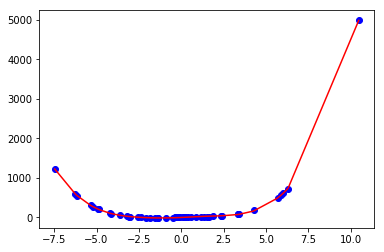

In [2]:
def spline(X, inters, M):

    Xe = np.empty((len(X), M + len(inters)))
    
    for i in range(M):
        Xe[:,i] = X[:,0]**i
    
    for i in range(len(inters)):
        Xe[:,M+i] = np.maximum(X[:, 0] - inters[i], 0)**(M-1)
    return Xe

N = 50
X = np.random.randn(N,1) * 4
y = 8.4*X[:,0] + 0.8*X[:,0]**2 +0.4*X[:,0]**4 - 3.5+0.3*np.random.randn(N)

q1 = np.percentile(X, 25)
q2 = np.percentile(X, 50)
q3 = np.percentile(X, 75)
H = spline(X, np.array([q1,q2,q3]), 4)

beta = np.linalg.inv(H.T @ H) @ H.T @ y
preds = H @ beta

utils.plot_reg(X, y, preds)
plt.show()

## Maximum Likelihood Inference

Let's define $Z$ a continious random variable that represents the data. $z_i = (x_i,y_i)$.  
We define a probabality density function for $Z$:
$$z_i \sim g_\theta(z)$$

$\theta$ represents the parameters governing the distribution of $Z$. For example, if $Z$ is normal we will have:
$$\theta = (\mu, \sigma^2)$$
$$g_\theta(z) = \frac{1}{\sqrt{2\pi \sigma^2}} \exp(-\frac{(z - \mu)^2}{2\sigma^2}) $$

We define the likelihood function as:
$$L(\theta;z) = g_\theta(z)$$
This is the probability of the observed data under the model $g_\theta$
$$L(\theta;Z) = \prod_{i=1}^N g_\theta(z_i)$$
$L(\theta;Z)$ is a function of $\theta$, with the observed data $Z$ fixed.  

We define the log-likelihood:
$$l(\theta;z) = \log L(\theta;z)$$
$$l(\theta;Z) = \sum_{i=1}^N \log g_\theta(z_i)$$  

The method of maximum likelihood choose the value $\hat{\theta}$ to maximize $l(\theta;Z)$  

We define sore function:
$$\dot{l}(\theta;Z) = \frac{\partial l(\theta;Z)}{\partial \theta}$$
$$\dot{l}(\theta;Z) = \sum_{i=1}^N \dot{l}(\theta;z_i)$$
$$\text{with } \dot{l}(\theta;z_i) = \frac{\partial l(\theta;z_i)}{\partial \theta}$$

We have $\dot{l}(\hat{\theta};Z)=0$.  

We define the information matrix as:
$$I(\theta) = -\sum_{i=1}^N \frac{\partial^2 l(\theta;z_i)}{\partial \theta \partial \theta^T}$$

$I(\hat{\theta})$ is called the obsvered information.  
The Fisher information is defined:
$$i(\theta) = E_\theta[I(\theta)]$$  

We denote $\theta_0$ as the true value of $\theta$.  
As $N \to \infty$, the sampling distribution of the matrix likelihood estimator has a limitting normal distribution:
$$\hat{\theta} \to \mathcal{N}(\theta_0, i(\theta_0)^{-1})$$  

The sampling distribution of $\hat{\theta}$ may be approximated by:
$$\mathcal{N}(\hat{\theta}, I(\hat{\theta})^{-1})$$

We can estimate the standard error of $\hat{\theta_j}$:
$$\text{se}[\hat{\theta_j}] = \sqrt{I(\hat{\theta}_{jj}^{-1}}$$

We can have condifence bounds for $\theta_j$:
$$\hat{\theta}_j \pm z^{(1-\alpha)} \sqrt{I(\hat{\theta}_{jj}^{-1}}$$

with $z^{(1 - \alpha)}$ the $1 - \alpha$ percentile of the standard normal distribution. For a condifence interval of 95\% for example, $z^{(1-\alpha)} = 1.96$ 

Let's apply the log-likelihood for a gaussian of parameters $\theta = (\beta, \sigma^2)$.  The log-likelihood is:

$$l(\theta) = -\frac{N}{2} \log \sigma^2 2\pi - \frac{1}{2\sigma^2} \sum_{i=1}^N (y_i - h(x_i)^T\beta)^2$$

We get the maximum likelihood estimate by solving:

$$\frac{\partial l(\theta)}{\partial \beta} = 0$$
$$\frac{\partial l(\theta)}{\partial \sigma^2} = 0$$

We get the results:

$$\hat{\beta} = (H^TH)^{-1}X^Ty$$
$$\hat{\sigma}^2 = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{\mu}(x_i))^2$$

They are identical to the least squares estimate.  
The part of the information matrix about $\beta$ is:
$$I(\beta) = (H^TH) \frac{1}{\sigma^2}$$

So the estimated variance $(H^TH)^{-1}\hat{\sigma}^2$ aggrees with least sqares estimate.  

So least squares and maximum likelihood with a Gaussian give the same results.

## Bootstrap versus Maximum Likelihood

Boostrap can be seen as a computer implementation of the maximum likelihood.

# Bayesian Methods

In the Bayesian approach, we define a sampling model $P(Z|\theta)$ for our data given the parameters, and a prior distribution $P(\theta)$ for the parameters, refecting our knowledge of $\theta$ before seeing $Z$.  
We then compute $P(\theta|Z)$, the updated knowledge of $\theta$ after seeing the data.

$$P(\theta|Z) = \frac{P(Z|\theta P(\theta))}{\int P(Z|\theta) P(\theta) d\theta}$$

The posterior distribution can also be used to predict values of fucture observations, via the predictive distribution:

$$P(z^\text{new}|Z) = \int P(z^\text{new}|\theta) P(\theta|Z)d\theta$$  

We can use the Bayesian approach to solve the example.  
Let's assume $\sigma^2$ kown, and $x_1,\text{...},x_N$ constant, the randomnes comes from $y$ varying around $\mu(x)$.  

We choose a Gaussian prior centered at zero:
$$\beta \sim \mathcal{N}(0, \tau \Sigma)$$

with prior correlation matrix $\Sigma$ and variance $\tau$

Using Bayesian approach, the posterior distribution is also Gaussian, with mean and coravriance:

$$E(\beta|Z) = \left(H^TH + \frac{\sigma^2}{\tau} \Sigma^{-1}\right)^{-1}H^Ty$$
$$\text{cov}(\beta|Z) = \left(H^TH + \frac{\sigma^2}{\tau} \Sigma^{-1}\right)^{-1}\sigma^2$$

For our problem, $\mu(x)$ should be smooths, we can make it bo choosing as a prior $\Sigma=I$.  
As $\tau \to \infty$, the posterior distribution and the bootstrap distribution coincide.  
When $\tau \to \infty$, the prior is called a noninformative prior.

# The EM Algorithm

## Two-Components mixture model

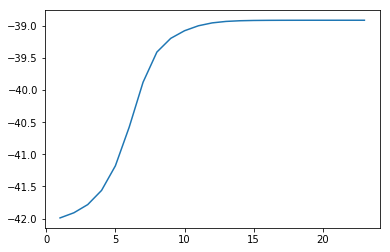

p = 0.44557035014334134
u1 = 1.0826249375972088
u2 = 4.655293230922111
s1 = 0.8105011324221852
s2 = 0.8196989381005306


In [3]:
def gauss_pdf(mu, s2, x):
    num = np.exp(-((x - mu)**2)/(2*s2))
    den = np.sqrt(2 * np.pi * s2)
    return num/den

def em(y, max_iters = 10000):
    
    #inititalization
    u1, u2 = np.random.choice(y, 2, replace=False)
    p = 0.5
    s1 = s2 = np.mean((y - np.mean(y))**2)
    lls = []
    
    for i in range(max_iters):
        
        ## Expectation Step
        res = np.empty(len(y))
        for i in range(len(y)):
            res[i] = (p*gauss_pdf(u2,s2,y[i])) / (
                (1-p)*gauss_pdf(u1,s1,y[i]) + p*gauss_pdf(u2,s2,y[i])
            )                                           
        
        ##maximization step
        u1 = np.sum((1 - res) * y) / np.sum(1 - res)
        u2 = np.sum(res * y) / np.sum(res)
        s1 = np.sum((1 - res) * (y - u1)**2) / np.sum(1 - res)
        s2 = np.sum(res * (y - u2)**2) / np.sum(res)
        p = np.mean(res)
        
        ##compute log-likelihood
        ll = 0
        for i in range(len(y)):
            ll += np.log((1-p)*gauss_pdf(u1,s1,y[i])
                       + p*gauss_pdf(u2,s2,y[i]))
        lls.append(ll)
        if len(lls) > 1:
            diff = (lls[-1] - lls[-2])**2
            if diff < 1e-10:
                break
        
    
    return p, u1, u2, s1, s2, lls

y = np.array([
    -0.39, 0.12, 0.94, 1.67, 1.76, 2.44, 3.72, 4.28, 4.92, 5.53,
     0.06, 0.48, 1.01, 1.68, 1.80, 3.25, 4.12, 4.60, 5.28, 6.22
])

p, u1, u2, s1, s2, lls = em(y)

plt.plot(np.arange(1,len(lls)+1), lls)
plt.show()

print('p =', p)
print('u1 =', u1)
print('u2 =', u2)
print('s1 =', s1)
print('s2 =', s2)

## Density Estimation

We have a dataset of points $x_1,\text{...},x_N$, with $x_i \in \mathbb{R}^p$.  
Density estimation build a model to estimate and fit the density $P(x)$.  

It can be used for anomaly detection. We have a dataset of normal events $x_1,\text{...},x_N$, and we build a model $P(x)$.  
For a new event $x$, we compute the probability that $x$ comes from $P(x)$. If this probability is too low, the example is detected as an anomaly

## Mixture of Gaussians

We have the random variable for our dataset $x$.  
Let's define a lattent (hidden / unobserved) latent variable $z$.  
$(x,z)$ have a joint distribution:
$$P(x,z) = P(x|z) P(z)$$

with
$$Z \sim \text{Multinomial}(\phi)$$
$$X|Z=j \sim \mathcal{N}(\mu_j, \Sigma_j)$$  

We need to find $\phi \in \mathbb{R}^{K}$ ($K$ number of gaussians), $\mu_j \in \mathbb{R}^p$, and $\Sigma_j \in \mathbb{R}^{p*p}$ that fit best the dataset $X$.  

If the $z_i$ are known, the problem can be easily solved with maximum likelihood estimation:
$$l(\phi,\mu,\Sigma) = \sum_{i=1}^N \log p(x_i,z_i;\phi,\mu,\Sigma)$$

We get the folowing estimators:

$$\phi_j = \frac{1}{N} \sum_{i=1}^N \mathbf{1}(z_i = j)$$

$$\mu_j = \frac{\sum_{i=1}^N \mathbf{1}(z_i = j)x_i}{\sum_{i=1}^N \mathbf{1}(z_i = j)}$$

$$\Sigma_j = \frac{\sum_{i=1}^N \mathbf{1}(z_i = j)(x_i - \mu_j)(x_i - \mu_j)^T}{\sum_{i=1}^N \mathbf{1}(z_i = j)}$$

In [4]:
N = 50#0000
p = 3
K = 4

rphi = [0.2, 0.5, 0.25, 0.05]

rmu = [
    np.array([1.4, 6.7, -2.4]),
    np.array([0.2, -5.2, 4.5]),
    np.array([-5.7, -5.3, -1.4]),
    np.array([3.5, 4.6, 2.8])
]

rsig = [
    np.array([[1.4,1.6,2.8],[0.4,-0.5,12.5],[7.8,4.2,-3.5]]),
    np.array([[1.8,-2.8,5.8],[8.4,3.4,-2.5],[-4.7,4.6,-0.7]]),
    np.array([[2.3,3.6,4.2],[7.3,2.2,-1.55],[6.2,6.2,12.2]]),
    np.array([[1.7,-4.8,3.9],[2.8,1.9,-6.5],[8.9,4.9,-6.8]])
]
for i in range(K):
    rsig[i] = rsig[i].T @ rsig[i] #generate PSD matrices


Zc = np.random.multinomial(N, rphi)
Z = []
for i in range(K):
    Z += [i] * Zc[i]
Z = np.array(Z).astype(np.int)
np.random.shuffle(Z)

X = np.empty((N, p))
for i in range(K):
    X[Z==i] = np.random.multivariate_normal(rmu[i], rsig[i], 
                                            size=len(X[Z==i]),
                                            check_valid='raise')
    
for i in range(K):
    print('phi[{}] = {}'.format(i, rphi[i]))
    print('mu[{}] = {}'.format(i, rmu[i]))
    print('sig[{}] ='.format(i))
    print(rsig[i])

phi[0] = 0.2
mu[0] = [ 1.4  6.7 -2.4]
sig[0] =
[[ 62.96  34.8  -18.38]
 [ 34.8   20.45 -16.47]
 [-18.38 -16.47 176.34]]
phi[1] = 0.5
mu[1] = [ 0.2 -5.2  4.5]
sig[1] =
[[ 95.89   1.9   -7.27]
 [  1.9   40.56 -27.96]
 [ -7.27 -27.96  40.38]]
phi[2] = 0.25
mu[2] = [-5.7 -5.3 -1.4]
sig[2] =
[[ 97.02    62.78    73.985 ]
 [ 62.78    56.24    87.35  ]
 [ 73.985   87.35   168.8825]]
phi[3] = 0.05
mu[3] = [3.5 4.6 2.8]
sig[3] =
[[ 89.94  40.77 -72.09]
 [ 40.77  50.66 -64.39]
 [-72.09 -64.39 103.7 ]]


In [5]:
def mle_mixture(X, Z, K):
    N = X.shape[0]
    p = X.shape[1]
    phi = np.zeros(K)
    mu = np.zeros((K, p))
    sig = np.zeros((K,p,p))
    
    #count number of samples from each mixture
    cs = np.zeros(K)
    for k in range(K):
        cs[k] = np.sum(Z == k)
    #print(cs)
    
    #compute phi
    phi = cs / N
        
    #compute mu
    for i in range(N):
        mu[Z[i]] += X[i]
    mu /= cs.reshape(K,1)
    
    #compute sig
    for i in range(N):
        sig[Z[i]] += np.outer(X[i] - mu[Z[i]], X[i] - mu[Z[i]])
    sig /= cs.reshape(K,1,1)
    
    return phi, mu, sig
    
    
    
phi, mu, sig = mle_mixture(X, Z, K)

for i in range(K):
    print('phi[{}] = {}'.format(i, phi[i]))
    print('mu[{}] = {}'.format(i, mu[i]))
    print('sig[{}] ='.format(i))
    print(sig[i])

phi[0] = 0.16
mu[0] = [ 6.83030077  9.81523784 -6.89434724]
sig[0] =
[[ 58.75850249  37.25204025 -20.92176941]
 [ 37.25204025  24.2950051  -20.43804884]
 [-20.92176941 -20.43804884 220.5537518 ]]
phi[1] = 0.6
mu[1] = [ 1.15535283 -4.95950239  2.896043  ]
sig[1] =
[[ 52.2629606    1.19635621   3.14975878]
 [  1.19635621  16.38472988 -15.68584243]
 [  3.14975878 -15.68584243  33.42905723]]
phi[2] = 0.2
mu[2] = [-4.99199098 -4.01332495  2.04466062]
sig[2] =
[[ 74.39138459  46.76362125  58.90115346]
 [ 46.76362125  42.1791728   68.25336861]
 [ 58.90115346  68.25336861 130.52718975]]
phi[3] = 0.04
mu[3] = [3.56327207 5.37717032 0.72195474]
sig[3] =
[[  0.13387665   2.89867135  -3.25366302]
 [  2.89867135  62.76146971 -70.4476804 ]
 [ -3.25366302 -70.4476804   79.07519847]]


## EM algorithm for mixture of Gaussians

Repeat E-Step and M-Step until convergence

### E-Step

Define $w_{ij} = P(z_i=j|x_i,\phi,\mu,\sigma)$
$$w_{ij} = \frac{P(x_i|z_i=j) P(z_i=j)}{\sum_{l=1}^K P(x_i|z_i=l) P(z_i=l)}$$

### M-Step

Apply MLE:

$$\phi_j = \frac{1}{N} \sum_{i=1}^N w_{ij}$$

$$\mu_j = \frac{ \sum_{i=1}^N w_{ij} x_i}{ \sum_{i=1}^N w_{ij}} $$

$$\sigma_j = \frac{ \sum_{i=1}^N w_{ij} (x_i - \mu_j)(x_i - \mu_j)^T}{ \sum_{i=1}^N w_{ij}}$$

In [6]:
class MultivariateNormal:
    
    def __init__(self, mu, cov):
        self.mu = mu
        self.cov = cov
        self.icov = np.linalg.inv(cov)
        #self.den = 1/np.sqrt(max(np.linalg.det(self.cov), 1e-8))
        p = len(self.mu)
        
        cdet = np.linalg.det(self.cov)
        if (cdet < 0):
            print(self.cov)
            print(self.icov)
            print(cdet)
            djdjdjhfh
        
        self.den = 1/np.sqrt((2*np.pi)**p * cdet)
        
    def pdf(self, x):
        num = np.exp(-.5  * (x-self.mu)@self.icov@(x-self.mu))
        return num/self.den
        

def em_gauss_mixture(X,k):
    N = X.shape[0]
    p = X.shape[1]
    phi = np.ones(K)*1/K
    
    mup = np.random.choice(len(X), K, replace=False)
    mu =  X[mup]
    
    Xc = np.mean(X,axis=0, keepdims=True)
    sigi = 1/N * (Xc - X).T @ (Xc - X)
    sig = np.repeat(sigi.reshape(1, p, p), repeats=K, axis=0)
    
    dens = [None] * K
    for k in range(K):
        dens[k] = MultivariateNormal(mu[k], sig[k])
    
    
    for ite in range(1):
    
        
        #Expectation step
        w = np.empty((N, K))
        for i in range(N):
            
            prs = np.array([
               dens[j].pdf(X[i]) * phi[j] for j in range(K) 
            ])
            prs_sum = np.sum(prs)
            
            for j in range(K):
                w[i,j] = prs[j] / prs_sum
        
        
        #Maximization step
        phi = 1/N * np.sum(w, axis=0)
        
        for j in range(K):
            sig[j] = 0
            for i in range(N):
                sig[j] += w[i,j]*np.outer(X[i] - mu[j], X[i] - mu[j])
            sig[j] /= np.sum(w[:,j])
        
        
        for j in range(K):
            mu[j] = np.sum(w[:,j].reshape(N,1)*X, axis=0) / np.sum(w[:,j])
        
        for j in range(K):
            dens[j] = MultivariateNormal(mu[j], sig[j])
            

        #print(phi)
        
            
            
    return phi, mu, sig 
    
phi, mu, sig = em_gauss_mixture(X,K)

print(phi)

[0.47494733 0.1042707  0.02203099 0.39875098]


## Jensen Inequality

Let $f$ a convex function ($f''(x) \geq 0$) and $X$ a random variable.  
$$f(E[X]) \leq E[f(X)]$$

If $f$ is strictly convex ($f''(x) > 0$):
$$f(E[X]) = E[f(X)] \text{ iff } X=E[X]$$

The opposite inequality holds for concave functions ($f''(x) \leq 0$):
$$f(E[X]) \geq E[f(X)]$$

## EM algorithm

the log-likelihood of our model is:

$$l(\theta) = \sum_{i=1}^N \log \sum_{z_i} P(x_i,z_i,\theta)$$

But the $z_i$ are not observed, and solving this problem with MLE is quite hard.  
Another strategy is to build a lower-bound for $l(\theta)$ (E-step) and optimize for that lower-bound (M-step).  

Let's define for each $i$  some distribution $Q_i$ over the $z$'s ($\sum_z Q_i(z) = 1, Q_i(z) \geq 0$).

Using Jensen Inequality, we find a lower bound for $l(\theta)$:
$$l(\theta) \geq \sum_{i=1}^N \sum_{z_i} Q_i(z_i) \log \frac{P(x_i,z_i;\theta)}{Q_i(z_i)}$$

To get a tight lower bound, we need the Jensen step to hold for equality:
$$\frac{P(x_i,z_i;\theta)}{Q_i(z_i)} = \text{constant}$$

Solving this equality, we get:
$$Q_i(z_i) = P(z_i|x_i;\theta)$$

EM algorithm:

- E-step:
$$\text{Set } Q_i(z_i) = P(z_i|x_i;\theta)$$

- M-Step:
$$\theta \leftarrow \arg \max_\theta \sum_{i=1}^N \sum_{z_i} Q_i(z_i) \log \frac{P(x_i,z_i;\theta)}{Q_i(z_i)}$$

## EM algorithm and coordinate ascent

Let's define:
$$J(Q,\theta) = \sum_{i=1}^N \sum_{z_i} Q_i(z_i) \log \frac{P(x_i,z_i;\theta)}{Q_i(z_i)}$$
Then we know that:
$$l(\theta) \geq J(Q,\theta)$$

We can prove that the EM algorithm is equivalent to applying Coordinate ascent on $J(Q,\theta)$:
- The E-Step maximixes $J$ with respect to $Q$
- The M-Step maximixes $J$ with respect to $\theta$

# MCMC for Sampling from the Posterior

In [7]:
mus = np.array([5, 5])
sigmas = np.array([[1, .9], [.9, 1]])

def get_exp_cov(X):
    e = np.mean(X, axis=0)
    cov = (X - e.reshape(1, -1)).T @ (X - e.reshape(1, -1)) / len(X)
    return e, cov

X = np.random.multivariate_normal(mus, sigmas, size=5000000)
e, cov = get_exp_cov(X)
print(e)
print(cov)

[4.99973432 4.99983867]
[[1.00113034 0.90072088]
 [0.90072088 1.00043999]]


In [8]:

class CondGauss:
    
    def __init__(self, mus, sigmas):
        self.mus = mus
        self.sigmas = sigmas
        
        self.sigma_xy = sigmas[0,0]-sigmas[1,0]/sigmas[1,1]*sigmas[1,0]
        self.sigma_yx = sigmas[1,1]-sigmas[0,1]/sigmas[0,0]*sigmas[0,1]

    def p_x_given_y(self, y):
        mu = self.mus[0]+self.sigmas[1,0]/self.sigmas[0,0]*(y-self.mus[1])
        return np.random.normal(mu, self.sigma_xy)

    def p_y_given_x(self, x):
        mu = self.mus[1]+self.sigmas[0,1]/self.sigmas[1,1]*(x-self.mus[0])
        return np.random.normal(mu, self.sigma_yx)


def gibbs_sampling(mus, sigmas, N=1000000):
    samples = np.zeros((N, 2))
    cond = CondGauss(mus, sigmas)
    y = np.random.rand() * 10

    for i in range(N):
        x = cond.p_x_given_y(y)
        y = cond.p_y_given_x(x)
        samples[i] = [x,y]

    return samples

samples = gibbs_sampling(mus, sigmas)
samples = samples[10000:]
samples = samples[::50]

print(samples.shape)


e, cov = get_exp_cov(samples)
print(e)
print(cov)

(19800, 2)
[5.00056319 5.002481  ]
[[0.18802328 0.16894376]
 [0.16894376 0.1879098 ]]


## Topic Modelling and LDA

LDA in as algorithm to compute a distribution of topics for each documents, and a distribution of words for each topic.  
It takes as input several documents as bag of words (number of instances of every word of the vocabulary for each document).  
The number of a topics in an hyperparameter.  
The algorithm can be used to distinguish topic between all documents. It can describes which words are more likely to appear for each topic.  
Finally, given a new document, it can computes it's topic distribution. This can be helpful to categorize the text, and to find other texts of similar topics (recommander system).  

Usually NLP preprocessing (stop words, lemming, stemming, filtering) is usually applied before building a bag of words from the documents.

In [9]:
'''
download dataset from kaggle:
https://www.kaggle.com/therohk/million-headlines/data
'''

import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora, models
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import nltk
nltk.download('wordnet')

np.random.seed(2018)

stemmer = PorterStemmer()

def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result



def load_data(max_docs = None):


    # Loading data
    print('Loading data...')


    data = pd.read_csv('../../data/abcnews-date-text.csv',
                       error_bad_lines=False)
    data_text = data[['headline_text']]
    data_text['index'] = data_text.index
    docs = data_text
    if max_docs is not None:
        docs = docs[:max_docs]


    # Preprocesing
    print('Preprocessing data...')



    docs = docs['headline_text'].map(preprocess)


    # Building dictionary and bag of words
    print('Building dictionarry and bag of words...')
    dic = gensim.corpora.Dictionary(docs)
    dic.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    bow = [dic.doc2bow(doc) for doc in docs]


    # Build tf-idf mdel
    print('Building tf-idf model...')
    tfidf = models.TfidfModel(bow)
    docs_tfidf = tfidf[bow]


    print('Get {} documents'.format(len(docs)))
    print('Get {} words'.format(len(dic)))
    
    return dic, bow, docs_tfidf

[nltk_data] Downloading package wordnet to /home/aiw/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
dic, bow, docs_tfidf = load_data()

print('Training LDA with bag of words')
lda_model = gensim.models.LdaMulticore(bow, num_topics=10, id2word=dic, passes=2, workers=2)

print('LDA results with bag of words:')
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    

print('Training LDA with TF-IDF')
lda_model_tfidf = gensim.models.LdaMulticore(docs_tfidf, num_topics=10, id2word=dic, passes=2, workers=4)

print('LDA results with TF-IDF')
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {}\nWords: {}'.format(idx, topic))

Loading data...
Preprocessing data...
Building dictionarry and bag of words...
Building tf-idf model...
Get 1103663 documents
Get 14173 words
Training LDA with bag of words
LDA results with bag of words:
Topic: 0 
Words: 0.024*"australia" + 0.022*"test" + 0.018*"hospit" + 0.017*"hour" + 0.013*"driver" + 0.011*"prison" + 0.011*"releas" + 0.011*"china" + 0.010*"young" + 0.010*"work"
Topic: 1 
Words: 0.025*"govern" + 0.018*"say" + 0.016*"chang" + 0.015*"nation" + 0.014*"countri" + 0.013*"live" + 0.013*"interview" + 0.011*"council" + 0.011*"school" + 0.011*"call"
Topic: 2 
Words: 0.020*"final" + 0.018*"win" + 0.015*"leagu" + 0.015*"lose" + 0.014*"citi" + 0.012*"game" + 0.012*"john" + 0.011*"announc" + 0.009*"unit" + 0.009*"celebr"
Topic: 3 
Words: 0.017*"donald" + 0.016*"adelaid" + 0.015*"turnbul" + 0.013*"feder" + 0.011*"centr" + 0.011*"vote" + 0.010*"port" + 0.009*"refuge" + 0.009*"save" + 0.009*"deal"
Topic: 4 
Words: 0.027*"report" + 0.021*"famili" + 0.017*"water" + 0.016*"time" + 0.01

In [11]:
dic, bow, docs_tfidf = load_data(max_docs=1000)

print('Training LDA with bag of words')
lda_model = gensim.models.LdaMulticore(bow, num_topics=10, id2word=dic, passes=2, workers=2)

print('LDA results with bag of words:')
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))
    

print('Training LDA with TF-IDF')
lda_model_tfidf = gensim.models.LdaMulticore(docs_tfidf, num_topics=10, id2word=dic, passes=2, workers=4)

print('LDA results with TF-IDF')
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Loading data...
Preprocessing data...
Building dictionarry and bag of words...
Building tf-idf model...
Get 1000 documents
Get 18 words
Training LDA with bag of words
LDA results with bag of words:
Topic: 0 
Words: 0.296*"say" + 0.240*"govt" + 0.172*"iraq" + 0.053*"death" + 0.053*"record" + 0.043*"plan" + 0.043*"investig" + 0.023*"claim" + 0.023*"continu" + 0.014*"rain"
Topic: 1 
Words: 0.594*"record" + 0.122*"say" + 0.094*"plan" + 0.094*"warn" + 0.021*"iraq" + 0.021*"polic" + 0.004*"council" + 0.004*"rain" + 0.004*"govt" + 0.004*"court"
Topic: 2 
Words: 0.234*"death" + 0.218*"charg" + 0.204*"continu" + 0.198*"investig" + 0.092*"polic" + 0.026*"murder" + 0.008*"claim" + 0.002*"plan" + 0.002*"iraq" + 0.002*"court"
Topic: 3 
Words: 0.632*"council" + 0.111*"plan" + 0.072*"warn" + 0.046*"iraq" + 0.030*"rain" + 0.026*"continu" + 0.026*"investig" + 0.015*"polic" + 0.015*"charg" + 0.003*"court"
Topic: 4 
Words: 0.482*"claim" + 0.405*"govt" + 0.044*"plan" + 0.016*"polic" + 0.014*"death" + 0.00

Let's define:
- $D$ the corpus of documents
- $K$ the number of topics
- $V$ the vocabulary size
- $N$ the number of documents

We define $\phi_k$ the distribution of words for the topic $k$:
$$\phi_k \sim \text{Dir}(\beta)$$
It's follows a dirichlet distribution with hyperparameter $\beta$.

We define $\theta_d$ the distribution of topics for the document $d$:
$$\theta_d \sim \text{Dir}(\alpha)$$
It's follows a dirichlet distribution with hyperparameter $\alpha$.

For each word $w_i$ in document $d$:
$$z_i \sim \text{Categorical}(\theta_d)$$
$$w_i \sim \text{Categorical}(\phi_{z_i})$$

Let's define the matrix $\phi \in \mathbb{R}^{K*V}$, with $\phi_{ij}$ the probability of word $j$ for the distribution of the topic $i$.  
Let's define the matrix $\theta \in \mathbb{R}^{N*K}$, with $\theta_{ij}$ the probability of topic $j$ for the distribution of the document $i$.  

The model gives us the following joint distribution:
$$p(w, z, \phi, \theta | \alpha, \beta) = p(\phi|\beta) p(\theta|\beta) p(z|\theta) p(w|\phi_z)$$

We are trying to learn the posterior distribution:
$$p(z, \phi, \theta | w, \alpha, \beta) = \frac{p(w, z, \phi, \theta | \alpha, \beta)}{p(w|\alpha,\beta)}$$
Unfortunatately this problem is intractable, the normalization factor cannot be computed.  
We are using Gibbs sampling to solve the problem

Let's define :
- $TA$, the topics assignment list, where $TA_{ij}$ is the topic assigned to the word $j$ in document $i$.
- $WT \in \mathbb{N}^{K*V}$, where $WT_{ij}$ is the number of times the word $j$ is assigned to the topic $i$.
- $DT \in \mathbb{N}^{N*K}$, where $DT_{ij}$ is the number of words assigned to the topic $j$ in the document $i$.
- $T_k = \sum_{j=1}^V WT_{kj}$ : total number of words assigned to topic $k$
- $W_k = \sum_{j=1}^K DT_{kj}$ : total number of words in document k

The goal of the algorithm is to determine $TA$, that is the $z_i$ for every words in every documents. Both matrices $WT$ and $DT$ are directly computed from $TA$.  

From $TA$, we can obtain $\phi$ and $\theta$:

$$\phi_{ij} = \frac{WT_{ij} + \beta}{T_i + V\beta}$$
$$\theta_{ij} = \frac{DT_{ij} + \alpha}{W_i + K\alpha}$$

We can sample from the conditional distribution of $z$:

$$p(z_i=k|z^{-i},w_i) \propto (DT^{-i}_{dk} + \alpha) \frac{WT^{-i}_{kw_i} + \beta}{T_k + V\beta}$$

with $z_i$ topic of word $w_i$ in document $d$. $z^{-i}$ refers to the topic when leaving word $w_i$ out of all calculations.  

The algorithm iterate and sample over all $p(z_i=k|z^{-i},w_i)$, updating each time the current value of $z_i$.

In [16]:
docs = [
    "eat turkey on turkey day holiday",
    "i like to eat cake on holiday",
    "turkey trot race on thanksgiving holiday",
    "snail race the turtle",
    "time travel space race",
    "movie on thanksgiving",
    "movie at air and space museum is cool movie",
    "aspiring movie star"
]



def prepr(docs):
    docs = [x.split(' ') for x in docs]
    return docs


def build_dic(docs):
    docs = [list(dict.fromkeys(x)) for  x in docs]
    dic = {}
    for d in docs:
        for w in d:
            if w not in dic:
                dic[w] = len(dic)

    return dic

def build_bow(docs, dic):
    res = []
    for d in docs:
        res.append([dic[w] for w in d])
    return res
    

docs = prepr(docs)
dic = build_dic(docs)
bow = build_bow(docs, dic)
for l in bow: print(l)

[0, 1, 2, 1, 3, 4]
[5, 6, 7, 0, 8, 2, 4]
[1, 9, 10, 2, 11, 4]
[12, 10, 13, 14]
[15, 16, 17, 10]
[18, 2, 11]
[18, 19, 20, 21, 17, 22, 23, 24, 18]
[25, 18, 26]


In [88]:
def LDA(bow, dic, K, alpha, beta, niters=10000):
    N = len(bow)
    V = len(dic)
    tk = np.zeros(K, dtype=np.int)
    wk = np.zeros(N, dtype=np.int)
    WT = np.zeros((K, V), dtype=np.int)
    DT = np.zeros((N, K), dtype=np.int)
    
    # Initialization: random assignment of topic to words of docs
    TA = list()
    for i in range(N):
        wk[i] = len(bow[i])
        TA.append(np.random.randint(0,K, size=wk[i]))
        
        for j in range(wk[i]):
            word = bow[i][j]
            topic = TA[i][j]
            WT[topic,word] += 1
            DT[i, topic] += 1
            tk[topic] += 1

    
    for it in range(niters):
        
        for d in range(N):
            for i in range(wk[d]):
                
                wi = bow[d][i]
                
                zi = TA[d][i]
                DT[d,zi]-=1
                WT[zi,wi]-=1
                tk[zi]-=1
                
                zips = np.empty(K)
                for k in range(K):
                    zips[k] = ((WT[k,wi] + beta) / (tk[k] + V * beta)) * (
                        (DT[d,k] + alpha) / 1# (wk[d] + K * alpha)
                    )

                zips = zips/np.sum(zips)
                zi = np.random.choice(K, p=zips)
                TA[d][i] = zi
                DT[d,zi]+=1
                WT[zi,wi]+=1
                tk[zi]+=1
                
            
        
        
        
    
    
    
    
    # Compute probas    
    phi = (WT + beta) / (tk.reshape(K,1) + V * beta)
    theta = (DT + alpha) / (wk.reshape(N,1) + K * alpha)
    return phi, theta
    
   
phi, theta = LDA(bow, dic, 3, 1, 1)

for k in range(len(phi)):
    msg = 'Topic {}\nWords: '.format(k)
    words = list(dic.keys())
    props = phi[k].tolist()
    
    props, words = zip(*sorted(zip(props, words), reverse=True))
    for i in range(5):
        msg += '{:.6f}*"{}"; '.format(proprs[i], words[i])
    print(msg)
    
#print(phi)
#print(theta)

Topic 0
Words: 0.046512*"race"; 0.046512*"holiday"; 0.046512*"turtle"; 0.023256*"turkey"; 0.046512*"to"; 
Topic 1
Words: 0.046512*"on"; 0.046512*"space"; 0.046512*"movie"; 0.023256*"trot"; 0.046512*"time"; 
Topic 2
Words: 0.046512*"turkey"; 0.046512*"thanksgiving"; 0.046512*"travel"; 0.023256*"star"; 0.046512*"on"; 
